# Load data

1. Set path:
    - dir_obs: path to train and test file containing precipitation observation
    - dir_predictors_train: path to predictors containing training period (2000 - 2017)  
    - dir_predictors_test: path to predictors containing test data (2018 and 2019)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.crs as ccrs

# Data:

1. Target variable: Precipitation amount
2. Data is divided into train and test
3. Grid of data: 19 x 61 
4. Training days: 6209
5. Test days: 730

In [3]:

dir_obs = '/home/gregor/datasets/precipitation/observation/'
dir_predictors_train = '/home/gregor/datasets/precipitation/predictors/train/'
dir_predictors_test = '/home/gregor/datasets/precipitation/predictors/test/' 

# Load observation

In [4]:
# load data
obs_train = xr.open_dataset(dir_obs + 'obs_precip_train.nc') 
obs_test = xr.open_dataset(dir_obs + 'obs_precip_test.nc')

# xarray --> numpy array
# obs_train_np = obs_train.precipitationCal.values
# obs_test_np = obs_test.precipitationCal.values

In [5]:
obs_train.precipitationCal.values.shape

(6209, 19, 61)

In [6]:
obs_test.precipitationCal.values.shape

(730, 19, 61)

In [7]:
from sklearn.model_selection import TimeSeriesSplit

In [11]:
cv_splits = TimeSeriesSplit(n_splits=5, test_size=500)

In [13]:
split = cv_splits.split(obs_train.precipitationCal.values)

In [18]:
for i, (train_idx, val_idx) in enumerate(cv_splits.split(obs_train.precipitationCal.values)):
    print(f'Fold {i}:')
    print(obs_train.precipitationCal.values[train_idx].shape, obs_train.precipitationCal.values[val_idx].shape)
    print(f'Train start: {train_idx[0]}, train end: {train_idx[-1]}')
    print(f'Val start: {val_idx[0]}, val end: {val_idx[-1]} \n')

Fold 0:
(3709, 19, 61) (500, 19, 61)
Train start: 0, train end: 3708
Val start: 3709, val end: 4208 

Fold 1:
(4209, 19, 61) (500, 19, 61)
Train start: 0, train end: 4208
Val start: 4209, val end: 4708 

Fold 2:
(4709, 19, 61) (500, 19, 61)
Train start: 0, train end: 4708
Val start: 4709, val end: 5208 

Fold 3:
(5209, 19, 61) (500, 19, 61)
Train start: 0, train end: 5208
Val start: 5209, val end: 5708 

Fold 4:
(5709, 19, 61) (500, 19, 61)
Train start: 0, train end: 5708
Val start: 5709, val end: 6208 



In [5]:
# have a look at nc file
obs_test

<xarray.Dataset>
Dimensions:           (lon: 61, lat: 19, time: 730)
Coordinates:
  * lon               (lon) float32 -25.0 -24.0 -23.0 -22.0 ... 33.0 34.0 35.0
  * lat               (lat) float32 0.0 1.0 2.0 3.0 4.0 ... 15.0 16.0 17.0 18.0
  * time              (time) datetime64[ns] 2017-12-02T06:00:00 ... 2019-12-0...
Data variables:
    precipitationCal  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Dec 06 17:00:33 2021: cdo remapcon,targetgrid2.txt imer...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [6]:
# select variable (DataArray)
obs_test.precipitationCal

<xarray.DataArray 'precipitationCal' (time: 730, lat: 19, lon: 61)>
[846070 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -25.0 -24.0 -23.0 -22.0 -21.0 ... 32.0 33.0 34.0 35.0
  * lat      (lat) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 14.0 15.0 16.0 17.0 18.0
  * time     (time) datetime64[ns] 2017-12-02T06:00:00 ... 2019-12-01T06:00:00
Attributes:
    units:    mm day-1

In [7]:
# xarray to numpy array with dimension time x latitude x longitude (730 x 19 x 61)
obs_test_array = obs_test.precipitationCal.values
print(obs_test_array.shape)

(730, 19, 61)


In [8]:
# Final numpy array
obs_test_array

array([[[1.54732103e-02, 1.36847012e-02, 6.02385290e-02, ...,
         5.34485435e+00, 1.08744562e+00, 9.79192197e-01],
        [7.14077102e-03, 2.10034754e-02, 1.56170458e-01, ...,
         2.33139348e+00, 3.58538419e-01, 1.21319331e-01],
        [9.68497526e-03, 2.00020019e-02, 7.73592517e-02, ...,
         1.01866193e-01, 1.60145592e-02, 1.71765629e-02],
        ...,
        [1.83243081e-01, 1.11313172e-01, 1.25517920e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.33539758e-03, 4.31620143e-03, 2.26755589e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.97390351e-05, 6.07439026e-04, 1.51960726e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[3.07084415e-02, 5.81172593e-02, 6.16085939e-02, ...,
         1.33220434e+00, 3.86028290e+00, 5.13183403e+00],
        [4.87759300e-02, 3.42701301e-02, 4.02122103e-02, ...,
         4.31426838e-02, 9.87556130e-02, 1.83431283e-01],
        [1.06849797e-01, 

In [9]:
# compute mean precipitation amount per grid point
mean_obs = obs_train.mean(dim='time')

In [10]:
mean_obs

<xarray.Dataset>
Dimensions:           (lon: 61, lat: 19)
Coordinates:
  * lon               (lon) float32 -25.0 -24.0 -23.0 -22.0 ... 33.0 34.0 35.0
  * lat               (lat) float32 0.0 1.0 2.0 3.0 4.0 ... 15.0 16.0 17.0 18.0
Data variables:
    precipitationCal  (lat, lon) float32 2.676 2.547 2.403 ... 0.1604 0.1862

In [11]:
mean_obs_numpy = mean_obs.precipitationCal.values

/home/gregor/anaconda3/envs/precip/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


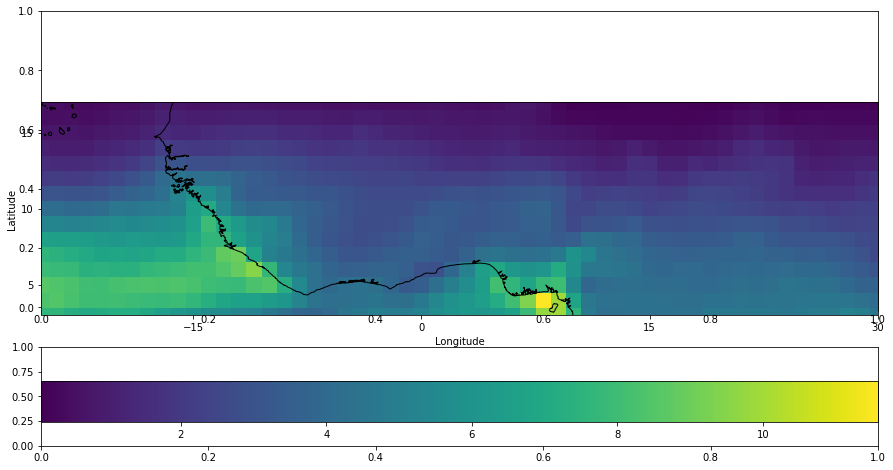

In [12]:
lons = obs_train.lon.values
lats = obs_train.lat.values

# Plot observation
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8), gridspec_kw={'height_ratios': [3, 1]})
ax1 = plt.axes(projection=ccrs.PlateCarree())
    #cf = plt.contourf(lons, lats, corr_grid, cmap = newcmp)
ax1.coastlines()
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_xlim(-25, 30)
ax1.set_ylim(3, 17)
    #cf = plt.contourf(lons, lats, sckillscore3,np.arange(-1*thres, (thres+0.01),0.01), cmap = newcmp)
cf = plt.pcolormesh(lons, lats, mean_obs_numpy, shading = 'nearest')
    #plt.scatter(np.repeat(2, 21),  lats)
    #plt.scatter(corres_lon, corres_lat)
ax1.set_xticks([-15, 0, 15, 30])
ax1.set_yticks([ 5, 10, 15])
    #plt.savefig('crpss_bern_relEPC_all_white_low.pdf', bbox_inches = 'tight', pad_inches=0)
F = fig.colorbar(cf, orientation='horizontal')

# Load predictors

In [13]:
# Load predictors for training
kindx_train = xr.open_dataset(dir_predictors_train + 'kindx_2000_2017.nc') 
corr1_train = xr.open_dataset(dir_predictors_train + 'corr_lag1_train.nc') 
corr2_train = xr.open_dataset(dir_predictors_train + 'corr_lag2_train.nc') 
corr3_train =xr.open_dataset(dir_predictors_train + 'corr_lag3_train.nc')
pw_train = xr.open_dataset(dir_predictors_train + 'tcwv_2000_2017.nc') 
cape_train = xr.open_dataset(dir_predictors_train + 'cape_2000_2017.nc') 
d2m_train = xr.open_dataset(dir_predictors_train + 'd2m_2000_2017.nc') 
t3_train = xr.open_dataset(dir_predictors_train + 't300_2000_2017.nc') 
t5_train = xr.open_dataset(dir_predictors_train + 't500_2000_2017.nc') 
t8_train = xr.open_dataset(dir_predictors_train + 't800_2000_2017.nc') 
rh5_train = xr.open_dataset(dir_predictors_train + 'rh500_2000_2017.nc') 
rh8_train = xr.open_dataset(dir_predictors_train + 'rh800_2000_2017.nc') 
toa_train = xr.open_dataset(dir_predictors_train + 'toa_0pm_2000_2017.nc') 
geodiff_train = xr.open_dataset(dir_predictors_train + 'geodiff_2000_2017.nc') 
cc_train = xr.open_dataset(dir_predictors_train + 'cloudcover_2000_2017.nc') 
clwc_train = xr.open_dataset(dir_predictors_train + 'cloudwater_2000_2017.nc') 
ciwc5_train = xr.open_dataset(dir_predictors_train + 'cloudice500_2000_2017.nc') 
temp_train = xr.open_dataset(dir_predictors_train + 't2m_2000_2017.nc') 
g5_train = xr.open_dataset(dir_predictors_train + 'geo500_2000_2017.nc') 
g7_train = xr.open_dataset(dir_predictors_train + 'geo700_2000_2017.nc')
sh7_train = xr.open_dataset(dir_predictors_train + 'specifichum700_2000_2017.nc')
vo7_train = xr.open_dataset(dir_predictors_train + 'relvor700_2000_2017.nc')
cin_train = xr.open_dataset(dir_predictors_train + 'cin_2000_2017.nc') 
shear_train = xr.open_dataset(dir_predictors_train + 'shear925_600_2000_2017.nc')
#sp_train = xr.open_dataset(dir_predictors_train + 'surfpressure_4pm_2000_2017.nc')  
sp_train = xr.open_dataset(dir_predictors_train + 'surfpressure_2000_2017.nc')  
#geo850_train = xr.open_dataset(dir_predictors_train + 'geo850_4pm_2000_2017.nc') 

In [14]:
# Load predictors for testing
kindx_test = xr.open_dataset(dir_predictors_test + 'kindx_2018_2019.nc') 
corr1_test = xr.open_dataset(dir_predictors_test + 'corr_lag1_test.nc') 
corr2_test = xr.open_dataset(dir_predictors_test + 'corr_lag2_test.nc') 
corr3_test =xr.open_dataset(dir_predictors_test + 'corr_lag3_test.nc')
pw_test = xr.open_dataset(dir_predictors_test + 'tcwv_2018_2019.nc') 
cape_test = xr.open_dataset(dir_predictors_test + 'cape_2018_2019.nc') 
d2m_test = xr.open_dataset(dir_predictors_test + 'd2m_2018_2019.nc')
t3_test = xr.open_dataset(dir_predictors_test + 't300_2018_2019.nc') 
t5_test = xr.open_dataset(dir_predictors_test + 't500_2018_2019.nc') 
t8_test = xr.open_dataset(dir_predictors_test + 't800_2018_2019.nc') 
rh5_test = xr.open_dataset(dir_predictors_test + 'rh500_2018_2019.nc') 
rh8_test = xr.open_dataset(dir_predictors_test + 'rh800_2018_2019.nc') 
toa_test = xr.open_dataset(dir_predictors_test + 'toa_0pm_2018_2019.nc') 
geodiff_test = xr.open_dataset(dir_predictors_test + 'geodiff_2018_2019.nc') 
cc_test = xr.open_dataset(dir_predictors_test + 'cloudcover_2018_2019.nc') 
clwc_test = xr.open_dataset(dir_predictors_test + 'cloudwater_2018_2019.nc') 
ciwc5_test = xr.open_dataset(dir_predictors_test + 'cloudice500_2018_2019.nc') 
temp_test = xr.open_dataset(dir_predictors_test + 't2m_2018_2019.nc') 
g5_test= xr.open_dataset(dir_predictors_test + 'geo500_2018_2019.nc') 
g7_test = xr.open_dataset(dir_predictors_test + 'geo700_2018_2019.nc')
sh7_test = xr.open_dataset(dir_predictors_test + 'specifichum700_2018_2019.nc')
vo7_test = xr.open_dataset(dir_predictors_test + 'relvor700_2018_2019.nc')
cin_test = xr.open_dataset(dir_predictors_test + 'cin_2018_2019.nc') 
shear_test = xr.open_dataset(dir_predictors_test + 'shear925_600_2018_2019.nc')
#sp_train = xr.open_dataset(dir_predictors_train + 'surfpressure_4pm_2000_2017.nc')  
sp_test = xr.open_dataset(dir_predictors_test + 'surfpressure_2018_2019.nc')  
#geo850_train = xr.open_dataset(dir_predictors_train + 'geo850_4pm_2000_2017.nc') 

In [15]:
# Xarray to Numpy array:

kindx_train_np = kindx_train.kx.values
kindx_test_np = kindx_test.kx.values

corr1_train_np = corr1_train.precip.values
corr1_test_np = corr1_test.precip.values

corr2_train_np = corr2_train.precip.values
corr2_test_np = corr2_test.precip.values

corr3_train_np = corr3_train.precip.values
corr3_test_np = corr3_test.precip.values

pw_train_np = pw_train.tcwv.values
pw_test_np = pw_test.tcwv.values

cape_train_np = cape_train.cape.values
cape_test_np = cape_test.cape.values

d2m_train_np = d2m_train.d2m.values 
d2m_test_np = d2m_test.d2m.values

t3_train_np = t3_train.t.values
t3_test_np = t3_test.t.values

t5_train_np = t5_train.t.values
t5_test_np = t5_test.t.values

t8_train_np = t8_train.t.values
t8_test_np = t8_test.t.values

rh5_train_np = rh5_train.r.values
rh5_test_np = rh5_test.r.values

rh8_train_np = rh8_train.r.values
rh8_test_np = rh8_test.r.values

toa_train_np = toa_train.tisr.values
toa_test_np = toa_test.tisr.values

geodiff_train_np = geodiff_train.z.values
geodiff_test_np = geodiff_test.z.values

cc_train_np = cc_train.tcc.values
cc_test_np = cc_test.tcc.values

clwc_train_np = clwc_train.tclw.values
clwc_test_np = clwc_test.tclw.values

ciwc5_train_np = ciwc5_train.ciwc.values
ciwc5_test_np = ciwc5_test.ciwc.values

temp_train_np = temp_train.t2m.values
temp_test_np = temp_test.t2m.values

g5_train = g5_train.z.values
g5_test = g5_test.z.values

g7_train_np = g7_train.z.values
g7_test_np = g7_test.z.values

sh7_train_np = sh7_train.q.values
sh7_test_np = sh7_test.q.values

vo7_train_np = vo7_train.vo.values 
vo7_test_np = vo7_test.vo.values 

cin_train_np = cin_train.cin.values
cin_test_np = cin_test.cin.values

shear_train_np = shear_train.shear.values
shear_test_np = shear_test.shear.values

sp_train_np = sp_train.sp.values
sp_test_np = sp_test.sp.values

In [ ]:
# shape for all training variables should be: (6209, 19, 61)
# shape for all testing variables should be: (730, 19, 61)

In [ ]:
# Start with Subset of data?

# --> Use the following: 
# kindx_train_np
# corr1_train_np
# pw_train_np
# cape_train_np
# rh8_train_np
# d2m_train_np
# geodiff_train_np
# sp_train_np